## Linear Regression From Scratch

#### Importing necessary libraries

In [254]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 

In [255]:
# Importing data present in text format
filename = 'ex1/ex1data1.txt'
data = np.loadtxt(filename, delimiter = ',')
cols = ['population', 'revenue']
X = data[:,0]
y = data[:,1]
df = pd.DataFrame({'Population(10,000)':X, 'Profit(10,000$)':y})
df.head(10)

,"Population(10,000)","Profit(10,000$)"
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


In [256]:
df.describe()

,"Population(10,000)","Profit(10,000$)"
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Text(0, 0.5, 'Profit(10,000$)')

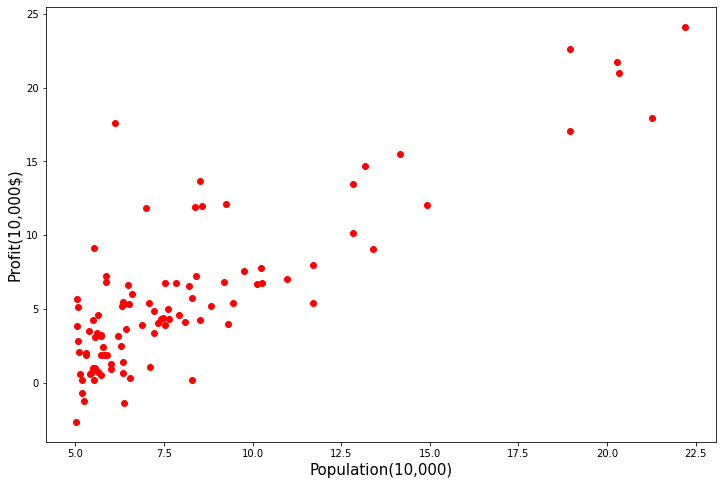

In [257]:
# Plotting data
plt.figure(figsize = (12,8))
plt.scatter(X,y,color = 'r')
plt.xlabel('Population(10,000)', fontsize = 15)
plt.ylabel("Profit(10,000$)", fontsize = 15)

Defining a Function to calculate loss value. For Linear Regression we generally use mean squared error as cost function, because it is a convex function for linear Regression

In [258]:
# Defining function to calculate Cost
def ComputeCost(X,y, theta):
    m = y.size
    cost = 0
    #Using Vectorization
    predict = np.dot(X,theta)
    cost = (1/(2*m))*np.sum(np.square(predict - y))
    return cost

Adding Bias term to the data and defining initial value of theta. 

In [259]:
m = len(y)
X_new = np.stack([np.ones(m), X], axis = 1)
#X_new = np.c_[np.ones((m,1)), X]
#print(X_b.shape)
print(X_new.shape)
theta = np.array([0.0,0.0])
print(theta.shape)

(97, 2)
(2,)


In [260]:
print("Computed cost for theta  [0,0]:  %.2f "%ComputeCost(X_new,y, theta))
print("Computed cost for theta  [-1,2]:  %.2f "%ComputeCost(X_new,y,np.array([-1,2])))

Computed cost for theta  [0,0]:  32.07 
Computed cost for theta  [-1,2]:  54.24 


Function to calculate features(theta). Here alpha and iterations are hyperparameters and can be changed to produce better results.

In [272]:
def gradient_descent(X,y, theta,alpha = 0.01, iterations = 1500):
    m = y.size
    J_history = []
    for i in range(iterations):
        theta = theta - (alpha/m)*np.dot(X.T,np.dot(X,theta) - y)
        J_history.append(ComputeCost(X, y, theta))
    return theta, J_history

In [273]:
theta, J_history = gradient_descent(X_new,y, theta)
print(theta)

[-3.87805118  1.1912525 ]


Text(0, 0.5, 'cost')

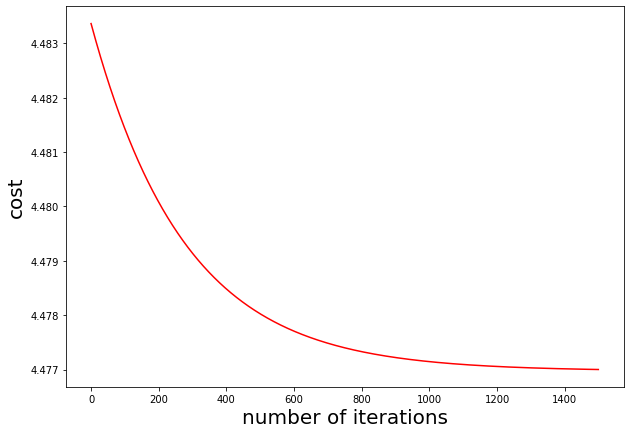

In [274]:
# Visualizing change in cost with number of iterations
iterations = 1500
plt.figure(figsize = (10,7))
plt.plot([i for i in range(iterations)], J_history,'r-')
plt.xlabel("number of iterations",fontsize=20)
plt.ylabel("cost",fontsize = 20)

This function below can be used as alternate way to calculate theta. It is simpler than gradient Descent as it does not need any hyperparameters and works faster than gradient descent. But if there are many features then it would become very slow and it will be better to use gradient descent.

In [264]:
def normal_equation(X,y, theta):
    theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta_best

In [265]:
normal_equation(X_new, y, theta)

array([-3.89578088,  1.19303364])

Plotting Regression line in the data

Text(0, 0.5, 'Profit(10,000$)')

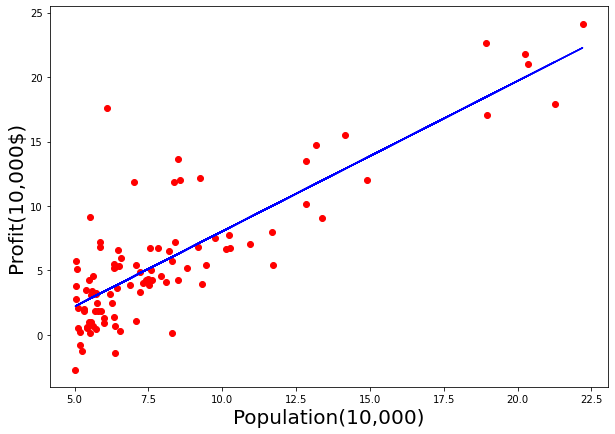

In [271]:
#line = -3.89578088 + 1.19303364*X
line = theta[0] + theta[1]*X
plt.figure(figsize = (10,7))
plt.scatter(X,y, color = 'red')
plt.plot(X,line, color = 'blue')
plt.xlabel('Population(10,000)',fontsize = 20)
plt.ylabel("Profit(10,000$)",fontsize = 20)

In [269]:
# Predicting profit for population of 35,000 and 70,000
predict1 = np.dot([1, 3.5], theta)
print('For population = 35,000, we predict a profit of {:.2f}\n'.format(predict1*10000))

predict2 = np.dot([1, 7], theta)
print('For population = 70,000, we predict a profit of {:.2f}\n'.format(predict2*10000))

For population = 35,000, we predict a profit of 4519.77

For population = 70,000, we predict a profit of 45342.45

